In [8]:
import albumentations as A
import cv2
import numpy as np
import random

In [3]:
image = cv2.imread("/media/jess/DATA/PhD/data/ecoflow/yolo_labels/14_classes (copy 1)/10_img/images/001B_2017_Hook_IMG_0022_d0a6e9bc.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
box_path = '/media/jess/DATA/PhD/data/ecoflow/yolo_labels/14_classes (copy 1)/10_img/labels/001B_2017_Hook_IMG_0022_d0a6e9bc.txt'
box_text = open(box_path, 'r')
box_text = box_text.readline().replace('\n', '').split(' ')
bbox = box_text[1:] + [box_text[0]]
bbox = [list(np.float_(bbox))]
labels = [bbox[0][-1]]

In [39]:
random.seed(7)
width = random.randint(0, 640)
height = random.randint(0, 640)
transform = A.Compose([
    A.Flip(p=0.5),
    A.RandomSizedBBoxSafeCrop(p=0.5, erosion_rate=0.5, width=width, height=height),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(p=0.5),
    A.GaussianBlur(p=0.5),
    A.Rotate(p=0.5)
], bbox_params=A.BboxParams(format='yolo', label_fields=['labels']))

In [40]:
transformed = transform(image=image, bboxes=bbox, labels=labels)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

In [46]:
type(transformed_image)

numpy.ndarray

In [56]:
# print(transformed_bboxes)
transformed_bboxes[0][:-1]

(0.7761006289308177, 0.5, 0.4477987421383648, 1.0)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_image_with_bboxes(image, bboxes, labels):
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(1)
    
    # Display the image
    ax.imshow(image)
    
    # Now, loop through the bboxes and add them to the plot
    for bbox, label in zip(bboxes, labels):
        # Extract the bounding box details
        x_center, y_center, width, height, class_id = bbox
        # Convert from YOLO format to matplotlib format
        # YOLO format: [x_center, y_center, width, height, class_id]
        # Matplotlib format: [x_min, y_min, width, height]
        x_min = (x_center - width / 2) * image.shape[1]
        y_min = (y_center - height / 2) * image.shape[0]
        
        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width * image.shape[1], height * image.shape[0],
                                 linewidth=1, edgecolor='r', facecolor='none', label=f'Class {int(class_id)}')
        
        # Add the rectangle to the Axes
        ax.add_patch(rect)
    
    # Add legend
    ax.legend(loc='upper left')
    
    # Show the plot
    plt.show()


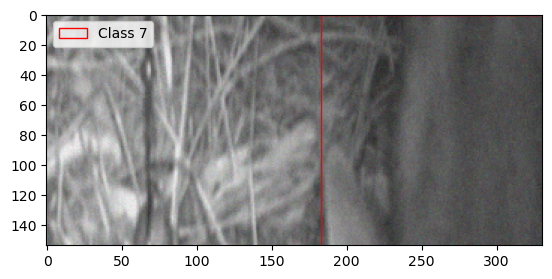

In [41]:
# Assuming 'transformed_image' is your image array from Albumentations and 'transformed_bboxes' contains the bounding boxes
plot_image_with_bboxes(transformed_image, transformed_bboxes, [bbox[-1] for bbox in transformed_bboxes])

In [47]:
from PIL import Image
im_test = Image.fromarray(transformed_image)
im_test.save('test.jpg')